In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn import model_selection
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
X, y = load_diabetes(return_X_y=True)

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [14]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [31]:
def mean_squared_error(y, y_prediction):
    return sum((y - y_prediction)**2) / len(y)

In [38]:
def bias(y, z):
    return(y - z)

In [39]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [40]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [41]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [42]:
eta = 1
n_trees = [1, 3, 5, 7, 15, 25]
max_depth = [1, 2, 3, 4, 5]


In [69]:
final = []
for tree in n_trees:
    coefs = [1] * tree
    for depth in max_depth:
        trees, train_errors, test_errors = gb_fit(tree, depth, X_train, X_test, y_train, y_test, coefs, eta)
        final.append((tree, depth, train_errors[-1], test_errors[-1]))

In [61]:
# Ошибки для первого дерева слишком большие уберм их в отдельный array
final_1 = final[0 : 5]
final_1

[(1, 1, 29056.148036253777, 29129.153153153155),
 (1, 2, 29056.148036253777, 29129.153153153155),
 (1, 3, 29056.148036253777, 29129.153153153155),
 (1, 4, 29056.148036253777, 29129.153153153155),
 (1, 5, 29056.148036253777, 29129.153153153155)]

In [78]:
final_new = final[5 : ]
final_new

[(3, 1, 3344.565920174065, 4059.601828846791),
 (3, 2, 2916.5705196618687, 3995.778092385712),
 (3, 3, 2490.968980486931, 4307.39337932662),
 (3, 4, 2048.6902141563714, 4401.923889008181),
 (3, 5, 1477.036618369127, 4713.654077818293),
 (5, 1, 3083.3817251586015, 3754.587408740382),
 (5, 2, 2650.7122332476742, 4155.804720687089),
 (5, 3, 2164.8864690265905, 4742.092567154561),
 (5, 4, 1415.33052964616, 4675.231949354292),
 (5, 5, 934.4957916771401, 4933.437525289073),
 (7, 1, 2900.5705161826054, 3728.905131528062),
 (7, 2, 2354.7670420792056, 4107.225417852366),
 (7, 3, 1803.7928007420098, 4676.94043914966),
 (7, 4, 951.7706259871451, 4873.848202427288),
 (7, 5, 575.0111806498986, 4854.733390123384),
 (15, 1, 2539.308225321096, 3534.6011361921815),
 (15, 2, 1753.099449723023, 3840.423714117862),
 (15, 3, 915.7092209459122, 5395.206877269005),
 (15, 4, 217.86039064449272, 5761.309926694622),
 (15, 5, 39.19589509719072, 5341.9865196694755),
 (25, 1, 2228.827195403144, 3429.4516170593743)

In [89]:
z_train = final_new[ : 5]
z_train

[(3, 1, 3344.565920174065, 4059.601828846791),
 (3, 2, 2916.5705196618687, 3995.778092385712),
 (3, 3, 2490.968980486931, 4307.39337932662),
 (3, 4, 2048.6902141563714, 4401.923889008181),
 (3, 5, 1477.036618369127, 4713.654077818293)]

In [100]:
df = pd.DataFrame(data=final[5 :], columns=['Trees', 'Depth', 'Train_error', 'Test_error'])
df

,Trees,Depth,Train_error,Test_error
0,3,1,3344.565920,4059.601829
1,3,2,2916.570520,3995.778092
2,3,3,2490.968980,4307.393379
3,3,4,2048.690214,4401.923889
4,3,5,1477.036618,4713.654078
5,5,1,3083.381725,3754.587409
6,5,2,2650.712233,4155.804721
7,5,3,2164.886469,4742.092567
8,5,4,1415.330530,4675.231949
9,5,5,934.495792,4933.437525


In [106]:
z_train = np.reshape(df['Train_error'].values, (-1, 5))
z_test = np.reshape(df['Test_error'].values, (-1, 5))

In [107]:
print(z_train)
print(z_test)

[[3.34456592e+03 2.91657052e+03 2.49096898e+03 2.04869021e+03
  1.47703662e+03]
 [3.08338173e+03 2.65071223e+03 2.16488647e+03 1.41533053e+03
  9.34495792e+02]
 [2.90057052e+03 2.35476704e+03 1.80379280e+03 9.51770626e+02
  5.75011181e+02]
 [2.53930823e+03 1.75309945e+03 9.15709221e+02 2.17860391e+02
  3.91958951e+01]
 [2.22882720e+03 1.33810541e+03 4.49375857e+02 3.85937563e+01
  1.15770846e+00]]
[[4059.60182885 3995.77809239 4307.39337933 4401.92388901 4713.65407782]
 [3754.58740874 4155.80472069 4742.09256715 4675.23194935 4933.43752529]
 [3728.90513153 4107.22541785 4676.94043915 4873.84820243 4854.73339012]
 [3534.60113619 3840.42371412 5395.20687727 5761.30992669 5341.98651967]
 [3429.45161706 4516.05447507 6160.95453691 5992.0346623  5413.62708969]]


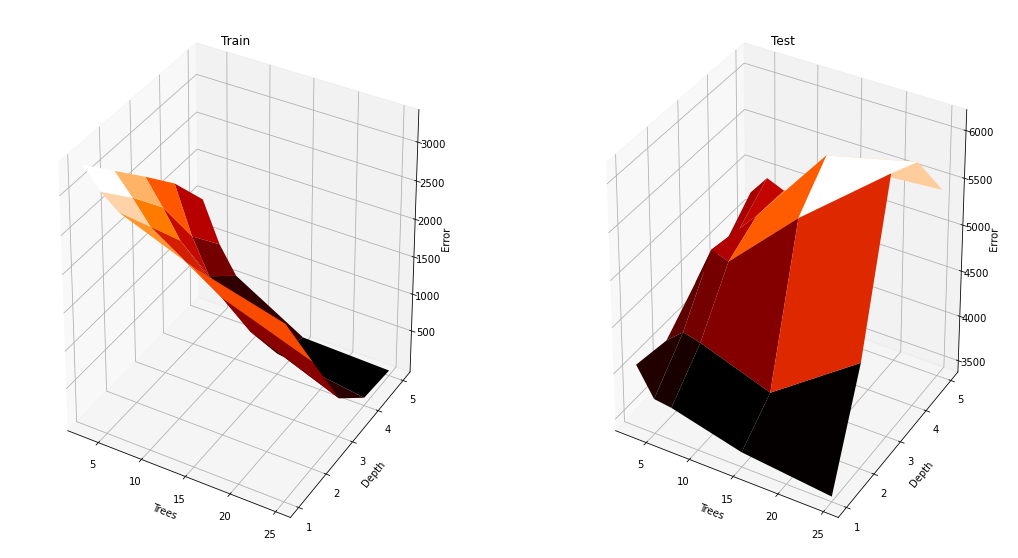

In [138]:
fig = plt.figure(figsize=(18, 10))

ax = fig.add_subplot(121, projection='3d', title='Train')
ax.plot_surface(x, y, z_train, cmap='gist_heat')
ax.set_yticks(np.unique(y))
ax.set_xlabel('Trees')
ax.set_ylabel('Depth')
ax.set_zlabel('Error')

ax = fig.add_subplot(122, projection='3d', title='Test')
ax.plot_surface(x, y, z_test, cmap='gist_heat')
ax.set_yticks(np.unique(y))
ax.set_xlabel('Trees')
ax.set_ylabel('Depth')
ax.set_zlabel('Error')

plt.show()

C ростом числа деревьев видим уменьшение ошибки. При большом числе деревьев идет небольшое увеличение ошибки на тесте - начинается небольшое переобучение .

 С ростом глубины деревьев заметно сильное переобучение модели (ошибка на трейне уменьшается, но при этом ошибка на тесте растет сильно),  данный параметр требуется отрегулировать.
